In [2]:
!pip install similaritymeasures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for similaritymeasures: filename=similaritymeasures-0.7.0-py3-none-any.whl size=15452 sha256=16db5927ef7e4c67792322fb48e163daa0b69813b81fc17a02ee68c43c370a84
  Stored in directory: /root/.cache/pip/wheels/24/a6/80/6f1676caf08ab1b69d74c8a727c96fdd3903d891672b415008
Successfully built similaritymeasures


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Hegarty Lab RA Folder/SilctonDSPSHQ-22Summer/NewDesktopDSPDataProcessing

/content/drive/MyDrive/Hegarty Lab RA Folder/SilctonDSPSHQ-22Summer/NewDesktopDSPDataProcessing


In [3]:
from analysis import Loader
from analysis import MovementAnalyzer, RotationAnalyzer
import pandas as pd
import numpy as np
from analysis import ShortcutMap
import random

In [6]:
pd.set_option('display.max_column', 500)

loader = Loader(data_dir="data", extra_dir="extra", image_dir="images")
loader.load(learning=True)

shortcut_map = ShortcutMap("extra/new_walls.csv", "extra/objects.csv", "extra/new_shortcuts.csv")
learning_map = ShortcutMap("extra/learning_walls.csv","extra/objects.csv",learning=True)

ShortcutMap: Loaded 12 objects
ShortcutMap: Loaded 12 objects


In [7]:
# Currently the movement analyzer can only handle normal (not alternative) trials, will add that later this week
movement_analyzer = MovementAnalyzer(loader, shortcut_map=shortcut_map, learning_map=learning_map)

# rotation analyzer gives the absolute angular error for each trial (both normal and alternative)
rotation_analyzer = RotationAnalyzer(loader)

In [8]:
efficiencies = movement_analyzer.calculate_efficiency_for_all_subjects()
#print(efficiencies)

failures = movement_analyzer.calculate_failure_for_all_subjects()
#print(failures)

errors = rotation_analyzer.calculate_estimation_error_for_all_subjects(3,23)
#print(errors)

wayfinding processing: JA21AC
wayfinding processing: BR22FA
wayfinding processing: LA27WA
wayfinding processing: NI14CO
wayfinding processing: SO12RI
wayfinding processing: RA28CH
wayfinding processing: SH01GU
wayfinding processing: Ji18Fe
wayfinding processing: CI13GA
wayfinding processing: BE10AH
wayfinding processing: TE25EL
wayfinding processing: GI22SA
wayfinding processing: GR25BE
wayfinding processing: CH07DR
wayfinding processing: le19he
wayfinding processing: JE02DE
wayfinding processing: BR20CO
wayfinding processing: TA21CA
wayfinding processing: JO25TA
wayfinding processing: MI23GO
wayfinding processing: br19fr
wayfinding processing: MA28NG
wayfinding processing: le28ed
wayfinding processing: LU16WA
wayfinding processing: PA24MA
wayfinding processing: XI31SH
wayfinding processing: DA17HA
wayfinding processing: IS04LI
wayfinding processing: BR21FR
wayfinding processing: MA14BL
wayfinding processing: TA26LE
wayfinding processing: AV16ME
wayfinding processing: gr28do
wayfinding

In [9]:
# calculate Frechet Distances for each trajectory
frechet_distances = movement_analyzer.calculate_frechet_for_all_subjects()

Frechet processing: JA21AC
Frechet processing: BR22FA
Frechet processing: LA27WA
Frechet processing: NI14CO
Frechet processing: SO12RI
Frechet processing: RA28CH
Frechet processing: SH01GU
Frechet processing: Ji18Fe
Frechet processing: CI13GA
Frechet processing: BE10AH
Frechet processing: TE25EL
Frechet processing: GI22SA
Frechet processing: GR25BE
Frechet processing: CH07DR
Frechet processing: le19he
Frechet processing: JE02DE
Frechet processing: BR20CO
Frechet processing: TA21CA
Frechet processing: JO25TA
Frechet processing: MI23GO
Frechet processing: br19fr
Frechet processing: MA28NG
Frechet processing: le28ed
Frechet processing: LU16WA
Frechet processing: PA24MA
Frechet processing: XI31SH
Frechet processing: DA17HA
Frechet processing: IS04LI
Frechet processing: BR21FR
Frechet processing: MA14BL
Frechet processing: TA26LE
Frechet processing: AV16ME
Frechet processing: gr28do
Frechet processing: su03ni
Frechet processing: AU24FR
Frechet processing: LU25MA
Frechet processing: RA16WO
F

In [10]:
frechet_table = pd.DataFrame.from_dict(frechet_distances).transpose()

# assume your data is stored in a pandas DataFrame called df
# with participant names as index and trial numbers as columns

# define a function to check if the shortcut value is minimum among ('shortcut', 'shortcut_reversed', 'lean', 'topo')

def is_shortest(col):
    shortcuts = [col['learn'], col['learn_reversed'], col['shortcut'], col['topo']]
    check = col['shortcut'] == min(shortcuts) and col['failure'] == 0
    return check

def process_each_subject(row):
    return row.apply(is_shortest).sum()

# use pandas' apply method to apply the is_shortest function to each row of the DataFrame
# then use pandas' sum method to count the number of rows where failure == 0 and shortcut is the minimum value
num_shortcut = frechet_table.apply(lambda row: row.apply(is_shortest).sum(), axis=1)

# change the row indexing to a column
num_shortcut = num_shortcut.reset_index()
# change the only column name to 'solution_index'
num_shortcut = num_shortcut.rename(columns={0:'num_shortcut','index':'subID'})

In [11]:
eff = pd.DataFrame.from_dict(efficiencies).transpose()
eff = eff.reset_index().rename(columns = {'index':'subID'})
sub_failure = pd.DataFrame(failures,index=[0]).transpose().reset_index().rename({'index':'subID',0:'num_failures'},axis=1)
point_err = pd.DataFrame.from_dict(errors).transpose()
point_err = point_err.reset_index().rename(columns = {'index':'subID'})
eff['eff_avg'] = eff.iloc[:,1:].mean(axis=1)
point_err['point_avg'] = point_err.iloc[:,1:].mean(axis=1)
dsp_sub = eff[['subID','eff_avg']].merge(point_err[['subID','point_avg']],on='subID').merge(sub_failure,on='subID').merge(num_shortcut,on='subID')
dsp_sub['solution_index'] = dsp_sub['num_shortcut']/(20-dsp_sub['num_failures'])
dsp_sub

,subID,eff_avg,point_avg,num_failures,num_shortcut,solution_index
0,JA21AC,1.780850,41.427493,4,12,0.750000
1,BR22FA,1.189583,17.012518,0,15,0.750000
2,LA27WA,1.150000,39.237465,0,16,0.800000
3,NI14CO,1.147097,13.904997,1,16,0.842105
4,SO12RI,1.942860,55.137507,1,7,0.368421
...,...,...,...,...,...,...
82,NO26TH,1.605752,40.072489,0,9,0.450000
83,AB04KO,1.945944,66.202485,4,9,0.562500
84,SI14GA,1.456805,53.054997,1,13,0.684211
85,TV10PA,1.737669,39.827443,1,11,0.578947


<Axes: >

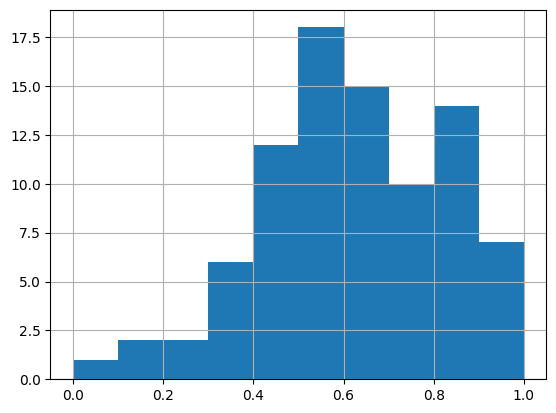

In [12]:
dsp_sub.solution_index.hist()

In [13]:
dsp_sub.to_csv("dsp_sub.csv",index=False)

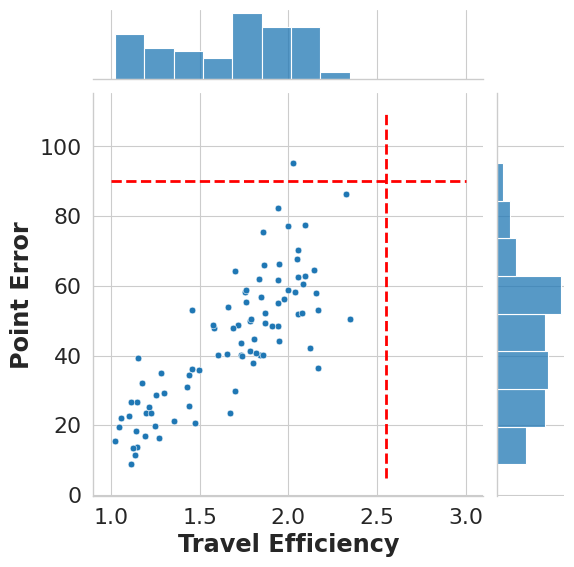

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
g = sns.jointplot(data=dsp_sub, y="point_avg", x="eff_avg")
g.ax_joint.set_ylabel('Point Error', fontweight='bold')
g.ax_joint.set_xlabel('Travel Efficiency', fontweight='bold')
g.ax_joint.plot([1,3], [90,90], 'r--', linewidth = 2)
g.ax_joint.plot([2.55,2.55],[5,110] , 'r--', linewidth = 2)
plt.show()

In [14]:
movement_analyzer.export_distance_summary()

In [15]:
movement_analyzer.export_processed_data_for_all_subjects()

In [ ]:
# can set up excluding
movement_analyzer.plots_for_all_subjects(save_only = True)

JA21AC, 3
JA21AC, 4
JA21AC, 5
JA21AC, 6
JA21AC, 7
JA21AC, 8
JA21AC, 9
JA21AC, 10
JA21AC, 11
JA21AC, 12
JA21AC, 13
JA21AC, 14
JA21AC, 15
JA21AC, 16
JA21AC, 17
JA21AC, 18
JA21AC, 19
JA21AC, 20
JA21AC, 21
JA21AC, 22
BR22FA, 3
BR22FA, 4
BR22FA, 5
BR22FA, 6
BR22FA, 7
BR22FA, 8
BR22FA, 9
BR22FA, 10
BR22FA, 11
BR22FA, 12
BR22FA, 13
BR22FA, 14
BR22FA, 15
BR22FA, 16
BR22FA, 17
BR22FA, 18
BR22FA, 19
BR22FA, 20
BR22FA, 21
BR22FA, 22
LA27WA, 3
LA27WA, 4
LA27WA, 5
LA27WA, 6
LA27WA, 7
LA27WA, 8
LA27WA, 9
LA27WA, 10
LA27WA, 11
LA27WA, 12
LA27WA, 13
LA27WA, 14
LA27WA, 15
LA27WA, 16
LA27WA, 17
LA27WA, 18
LA27WA, 19
LA27WA, 20
LA27WA, 21
LA27WA, 22
NI14CO, 3
NI14CO, 4
NI14CO, 5
NI14CO, 6
NI14CO, 7
NI14CO, 8
NI14CO, 9
NI14CO, 10
NI14CO, 11
NI14CO, 12
NI14CO, 13
NI14CO, 14
NI14CO, 15
NI14CO, 16
NI14CO, 17
NI14CO, 18
NI14CO, 19
NI14CO, 20
NI14CO, 21
NI14CO, 22
SO12RI, 3
SO12RI, 4
SO12RI, 5
SO12RI, 6
SO12RI, 7
SO12RI, 8
SO12RI, 9
SO12RI, 10
SO12RI, 11
SO12RI, 12
SO12RI, 13
SO12RI, 14
SO12RI, 15
SO12RI, 16
S

In [ ]:
# movement_analyzer.plot_all_topological_paths(folder="topo_plot", save_only=True)